**Linear** Classifier

# 1 SVM Classifier
## 1.1 load data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from data_util import load_CIFAR10
%matplotlib inline

In [4]:
X_train, y_train, X_test, y_test = load_CIFAR10()
print('train data shape:', X_train.shape)
print('train label shape:', y_train.shape)
print('test data shape:', X_test.shape)
print('test label shape:', y_test.shape)

train data shape: (50000, 32, 32, 3)
train label shape: (50000,)
test data shape: (10000, 32, 32, 3)
test label shape: (10000,)


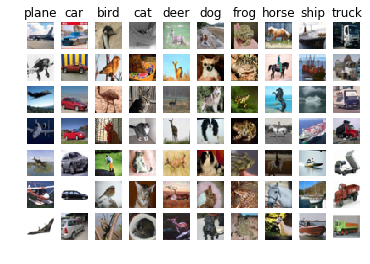

In [5]:
# display the images
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# 1.2 Take samples

In [6]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [7]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

[ 130.64189796  135.98173469  132.47391837  130.05569388  135.34804082
  131.75402041  130.96055102  136.14328571  132.47636735  131.48467347]


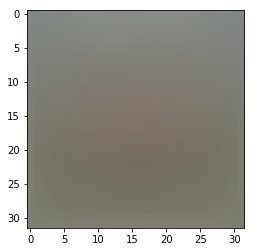

In [8]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print (mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

In [9]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [10]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print( X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [11]:
from linear_svm import svm_loss_naive
W = np.random.randn(10, 3073) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev.T, y_dev, 0.00001)
print ('loss: %f' % (loss, ))

loss: 8.942150


In [12]:
# use the svm
from linear_classifier import LinearSVM
svm = LinearSVM()
svm.fit(X_dev.T, y_dev, learning_rate=1e-3, reg=1e3,verbose=True)

iteration 0 / 100 : loss 41.528048


[41.528047671054608,
 9480.3683255035285,
 9152.7223602479316,
 15342.199018627964,
 11651.778615377931,
 13991.093836923856,
 9112.1461426030364,
 11866.661897037984,
 8325.9910621061699,
 13601.051904103802,
 13795.744537847202,
 13074.790739792765,
 10234.935768360392,
 11813.485742535784,
 12347.946487912799,
 12039.935636240132,
 13439.34580261114,
 12270.792795554933,
 12585.52722126411,
 9744.9908905128232,
 13517.780321742419,
 14776.382471680405,
 10530.247491833388,
 11510.473039349265,
 9371.2972935551188,
 14090.004072161699,
 11919.612467642328,
 16152.679445261903,
 12171.364614838814,
 12636.631222978303,
 12615.696102104801,
 12452.778864936958,
 15143.216949000751,
 15010.662559615661,
 10767.489379617815,
 9734.1086517664935,
 10139.930711605944,
 11682.005936431495,
 15105.804866773671,
 10284.079794489195,
 11745.761284261042,
 11093.110932009084,
 12190.471091443698,
 11944.292905975664,
 10175.455118191969,
 13011.475846772471,
 10391.273278694462,
 8741.306474079

In [13]:
pred = svm.predict(X_test.T)
print('accuracy is ', (pred==y_test).sum()/len(y_test))

accuracy is  0.122


# 1.3 Validation

In [23]:
learning_rates = [1.4e-7, 1.5e-7, 1.6e-7]
regularization_strengths = [(1+i*0.1)*1e4 for i in range(-3,3)] + [(2+0.1*i)*1e4 for i in range(-3,3)]
results = []
for learning_rate in learning_rates:
    for regularization_strength in regularization_strengths:
        svm = LinearSVM()
        svm.fit(X_train.T, y_train, learning_rate, regularization_strength, num_iters=1000)
        pred = svm.predict(X_val.T)
        accuracy = (pred==y_val).sum()/len(y_val)
        results.append('learnging_rate is '+str(learning_rate)+',regularization_strength is '+str(regularization_strength)
                      + ': accuarcy is :'+str(accuracy))


In [24]:
for value in results:
    print(value)

learnging_rate is 1.4e-07,regularization_strength is 7000.0: accuarcy is :0.373
learnging_rate is 1.4e-07,regularization_strength is 8000.0: accuarcy is :0.374
learnging_rate is 1.4e-07,regularization_strength is 9000.0: accuarcy is :0.387
learnging_rate is 1.4e-07,regularization_strength is 10000.0: accuarcy is :0.36
learnging_rate is 1.4e-07,regularization_strength is 11000.0: accuarcy is :0.372
learnging_rate is 1.4e-07,regularization_strength is 12000.0: accuarcy is :0.387
learnging_rate is 1.4e-07,regularization_strength is 17000.0: accuarcy is :0.38
learnging_rate is 1.4e-07,regularization_strength is 18000.0: accuarcy is :0.378
learnging_rate is 1.4e-07,regularization_strength is 19000.0: accuarcy is :0.382
learnging_rate is 1.4e-07,regularization_strength is 20000.0: accuarcy is :0.384
learnging_rate is 1.4e-07,regularization_strength is 21000.0: accuarcy is :0.403
learnging_rate is 1.4e-07,regularization_strength is 22000.0: accuarcy is :0.383
learnging_rate is 1.5e-07,regular

From above results, We know that hyperparamaters **learning rate** is 1.5e-7 and **regularization strength** is 21000,
the accuracy is highest.

In [26]:
svm = LinearSVM()
svm.fit(X_train.T, y_train, 1.5e-7, 21000, num_iters=1000)
pred = svm.predict(X_test.T)
print('test data accuracy is ', (pred==y_test).sum()/len(y_test))

test data accuracy is  0.378


# 2 Softmax Classifier

In [11]:
from linear_softmax import softmax_loss_naive
from linear_classifier import LinearSoftmax

In [14]:
softmax = LinearSoftmax()
softmax.fit(X_dev.T, y_dev, reg=2100)
pred = softmax.predict(X_test.T)
print('accuray is ', (pred==y_test).sum()/len(y_test))

/Users/gaufung/WorkSpace/StandfordCS231n/assignment1/linear_softmax.py:32: RuntimeWarning: divide by zero encountered in log
  loss += -1.0 * np.log(np.exp(scores[y[i]]+logC) / denominator)


accuray is  0.075


In [16]:
learning_rates = [1.4e-7, 1.5e-7, 1.6e-7]
regularization_strengths = [(1+i*0.1)*1e4 for i in range(-3,3)] + [(2+0.1*i)*1e4 for i in range(-3,3)]
results = []
for learning_rate in learning_rates:
    for regularization_strength in regularization_strengths:
        softmax = LinearSoftmax()
        softmax.fit(X_train.T, y_train, learning_rate, regularization_strength, num_iters=1000)
        pred = softmax.predict(X_val.T)
        accuracy = (pred==y_val).sum()/len(y_val)
        results.append('learnging_rate is '+str(learning_rate)+',regularization_strength is '+str(regularization_strength)
                      + ': accuarcy is :'+str(accuracy))

In [17]:
for value in results:
    print(value)

learnging_rate is 1.4e-07,regularization_strength is 7000.0: accuarcy is :0.29
learnging_rate is 1.4e-07,regularization_strength is 8000.0: accuarcy is :0.318
learnging_rate is 1.4e-07,regularization_strength is 9000.0: accuarcy is :0.34
learnging_rate is 1.4e-07,regularization_strength is 10000.0: accuarcy is :0.33
learnging_rate is 1.4e-07,regularization_strength is 11000.0: accuarcy is :0.352
learnging_rate is 1.4e-07,regularization_strength is 12000.0: accuarcy is :0.331
learnging_rate is 1.4e-07,regularization_strength is 17000.0: accuarcy is :0.359
learnging_rate is 1.4e-07,regularization_strength is 18000.0: accuarcy is :0.372
learnging_rate is 1.4e-07,regularization_strength is 19000.0: accuarcy is :0.361
learnging_rate is 1.4e-07,regularization_strength is 20000.0: accuarcy is :0.37
learnging_rate is 1.4e-07,regularization_strength is 21000.0: accuarcy is :0.364
learnging_rate is 1.4e-07,regularization_strength is 22000.0: accuarcy is :0.36
learnging_rate is 1.5e-07,regulariza